In [6]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import random

In [2]:
car_data = pd.read_csv('Car details v3.csv')

car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Realizamos la limpieza inicial de los datos
car_data['mileage'] = car_data['mileage'].str.extract('(\d+.\d+)').astype(float)
car_data['engine'] = car_data['engine'].str.extract('(\d+)').astype(float)
car_data['max_power'] = car_data['max_power'].str.extract('(\d+.\d+)').astype(float)

# Imputamos los valores faltantes usando la mediana para las columnas convertidas
car_data['mileage'] = car_data['mileage'].fillna(car_data['mileage'].median())
car_data['engine'] = car_data['engine'].fillna(car_data['engine'].median())
car_data['max_power'] = car_data['max_power'].fillna(car_data['max_power'].median())
car_data['seats'] = car_data['seats'].fillna(car_data['seats'].median())

# Extraemos el número principal del torque y manejamos las unidades
torque_values = car_data['torque'].str.extract(r'(\d+\.?\d?)').astype(float)
torque_units = car_data['torque'].str.extract(r'([Nn][Mm]|[Kk][Gg][Mm])')
car_data['torque_value'] = torque_values
torque_units_normalized = torque_units[0].str.lower().replace({'kgm': 9.81, 'nm': 1, 'nm ': 1, 'nm': 1})
car_data['torque_value'] = car_data['torque_value'] * torque_units_normalized.astype(float)
car_data['torque_value'] = car_data['torque_value'].fillna(car_data['torque_value'].median())

# Aplicamos codificación One-Hot a las variables categóricas
car_data = pd.get_dummies(car_data, columns=['fuel', 'seller_type', 'transmission', 'owner'])

# Preparamos las características (X) y la variable objetivo (y)
X = car_data.drop(['name', 'selling_price', 'torque'], axis=1)  # Eliminar columnas que no se van a utilizar
y = car_data['selling_price']

# Comprobamos los tipos de datos de X para confirmar que todos son numéricos
X_dtypes = X.dtypes
X_nulls = X.isnull().sum()  # Comprobar si hay valores nulos en X

X_dtypes, X_nulls


(year                              int64
 km_driven                         int64
 mileage                         float64
 engine                          float64
 max_power                       float64
 seats                           float64
 torque_value                    float64
 fuel_CNG                           bool
 fuel_Diesel                        bool
 fuel_LPG                           bool
 fuel_Petrol                        bool
 seller_type_Dealer                 bool
 seller_type_Individual             bool
 seller_type_Trustmark Dealer       bool
 transmission_Automatic             bool
 transmission_Manual                bool
 owner_First Owner                  bool
 owner_Fourth & Above Owner         bool
 owner_Second Owner                 bool
 owner_Test Drive Car               bool
 owner_Third Owner                  bool
 dtype: object,
 year                            0
 km_driven                       0
 mileage                         0
 engine           

In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los precios de venta para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de error para evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(273518.1642724445, 437791.5712271159, 0.7076033418593694)

In [11]:
# Seleccionar una observación aleatoria del conjunto de prueba
random_index = random.choice(X_test.index)
sample_data = X_test.loc[random_index].to_frame().T  # Convertir la serie en dataframe transpuesto para el modelo

# Hacer una predicción utilizando el modelo entrenado
predicted_price = model.predict(sample_data)

# Mostrar los atributos del automóvil seleccionado y la predicción de precio
attributes = car_data.loc[random_index]
predicted_price = predicted_price[0]  # Extraer el valor de la predicción del array

attributes, predicted_price

(name                            Fiat Avventura Power Up 1.3 Active
 year                                                          2016
 selling_price                                               360000
 km_driven                                                   100000
 mileage                                                       20.5
 engine                                                      1248.0
 max_power                                                    91.72
 torque                                              209Nm@ 2000rpm
 seats                                                          5.0
 torque_value                                                 209.0
 fuel_CNG                                                     False
 fuel_Diesel                                                   True
 fuel_LPG                                                     False
 fuel_Petrol                                                  False
 seller_type_Dealer                             

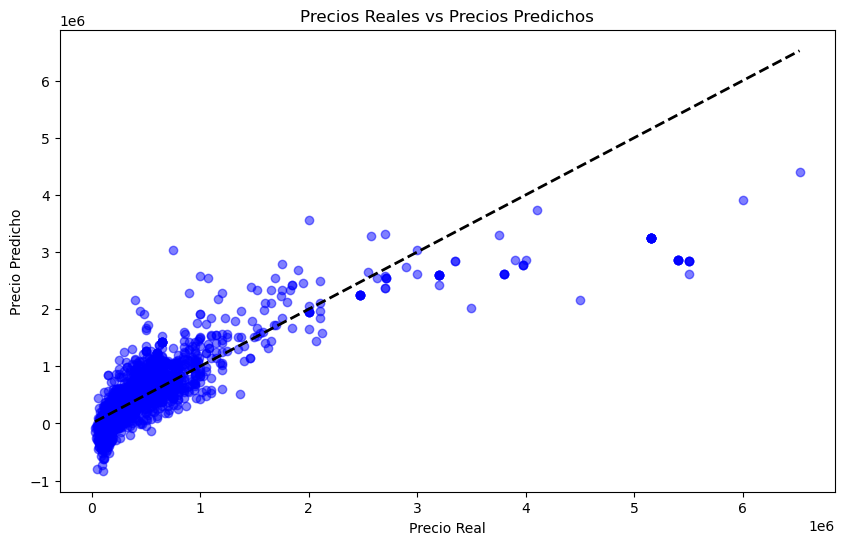

In [12]:
import matplotlib.pyplot as plt

# Graficar precios reales vs precios predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Precios Reales vs Precios Predichos')
plt.show()